#Trabalho de Mineração de dados

**Alunos:** Halliday Gauss Costa dos Santos e Guilherme Augusto


# **O Problema:** Titanic - Machine Learning from Disaster

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, será construído um modelo preditivo que responda à pergunta: “que tipo de pessoa tem mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc).





# **Objetivo:** 


Usar o aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic. Para isso será utilizado a mineração dos dados na base de dados, de maneira que os mesmos se tornem úteis para que a aplicação de um algoritmo de classificação seja eficiente e aceitável.

#Descrição dos Atributos
------------------------------------------------------------------------

**PassengerId** 

 - Um ID exclusivo para cada passageiro.

 - Atributo Categórico Ordinal

------------------------------------------------------------------------

**Survived** 
- Se o passageiro sobreviveu (1) ou não (0).
- Atributo Binário Simétrico (O que deve ser predito)

------------------------------------------------------------------------
**Pclass** 
- Classe do bilhete. 1º = Alto - 2º = Médio - 3º = Baixo.
- Atributo Categórico Ordinal

------------------------------------------------------------------------

**Name** 
- O nome do Passageiro.
- Atributo Categórico Nominal

------------------------------------------------------------------------

**Sex** 
- Sexo do Passageiro.
- Atributo Binário Simétrico
------------------------------------------------------------------------

**Age** 
- A idade do passageiro.
- Atributo Discreto

------------------------------------------------------------------------

**SibSp** 
- Nº de irmãos/cônjuges do passageiro a bordo do Titanic.
- Atributo Discreto

------------------------------------------------------------------------

**Parch** 
- Nº de pais/filhos do passageiro a bordo do Titanic.
- Atributo Discreto

------------------------------------------------------------------------

**Ticket** 
- Número do bilhete do passageiro.
- Atributo Categórico Ordinal

------------------------------------------------------------------------

**Fare** 
- Tarifa do passageiro.
- Atributo Contínuo

------------------------------------------------------------------------

**Cabin** 
- Número da cabine. 
- Atributo Categórico Ordinal

------------------------------------------------------------------------
**Embarked** 
- Porto de embarcação. C = Cherbourg, Q = Queenstown, S = Southampton
- Atributo Categórico Nominal

------------------------------------------------------------------------

#Importações

In [5]:
# Bibliotecas processamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#Biblioteca seaborn
import seaborn as sns

from sklearn.impute import SimpleImputer # Fit e Transform em dados nulos
from sklearn.preprocessing import OneHotEncoder # Fazer one hot encoder
from sklearn import preprocessing # Para fazer a normalização dos dados

from mlxtend.frequent_patterns import apriori # Biblioteca para encontrar transações frequentes
from mlxtend.frequent_patterns import association_rules # Biblioteca para gerar as regras de associação
from mlxtend.preprocessing import TransactionEncoder # Para fazer o One Hot

#Ler Base de Dados

In [6]:
df = pd.read_csv("train.csv")

In [7]:
# Tamanho da base de Dados
tamanho_do_df = len(df.index)
print("Tamanho da base de dados:", tamanho_do_df)

print("Algumas instâncias da base de dados:")
df.head()

Tamanho da base de dados: 891
Algumas instâncias da base de dados:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Funções Auxiliares

Função que vai gerar um gráfico de pizza dos atributos nominais.

In [8]:
def plotar_grafico_de_pizza_nominal(df, nome_do_atributo, titulo = None):

  rotulos = list(df[nome_do_atributo].unique())

  data = [df[nome_do_atributo].eq(rot).sum() for rot in rotulos]

  if df[nome_do_atributo].isnull().sum() > 0:
    data[-1] = df[nome_do_atributo].isnull().sum() 
  
  if titulo is None:
    titulo = "Distribuição do atributo - " + nome_do_atributo

  explode = [0.1*i for i in range(len(rotulos))]

  wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = rotulos, 
                                  shadow = True,  
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  ax.legend(wedges, rotulos, 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
  plt.setp(autotexts, size = 8, weight ="bold") 
  ax.set_title(titulo) 
  plt.show() 
  plt.show() 

Função que vai plotar o gráfico de pizza da quantidade de atributos nulos e não nulos.

In [9]:
def plotar_grafico_de_pizza_nulos(df, nome_do_atributo):

  print("\nGráfico de Pizza - Valores Nulos - " + nome_do_atributo)
  titulo = "\nGráfico de Pizza - Valores Nulos - " + nome_do_atributo
  nulos = ['Nulos', 'Não Nulos'] 
  data = [df[nome_do_atributo].isnull().sum(), df[nome_do_atributo].count()] 

  explode = (0.1, 0.0) 
  colors = ("beige", "orange") 
  wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = nulos, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  ax.legend(wedges, nulos, 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
  plt.setp(autotexts, size = 8, weight ="bold") 
  ax.set_title(titulo) 
  plt.show() 
  plt.show() 

Função que vai fazer a análise estatística do atributo.

In [10]:
def analise_estatistica_atributo(df, nome_do_atributo): 
  # Analisar Atributo - Age
  print("Análise Estatística do atributo -", nome_do_atributo)
  print("Valor médio:", round(df[nome_do_atributo].mean(),2))
  print("Valor máximo:",round(df[nome_do_atributo].max(), 2))
  print("Valor mínimo:", round(df[nome_do_atributo].min(), 2))
  print("Valor desvio padrão:", round(df[nome_do_atributo].std(), 2))
  print("25% do valores contidos até:", round(df[nome_do_atributo].describe()[4], 2))
  print("50% do valores contidos até:", round(df[nome_do_atributo].describe()[5], 2))
  print("75% do valores contidos até:", round(df[nome_do_atributo].describe()[6], 2))

Função que vai plotar o histograma de um atributo.

In [11]:
def plotar_histograma_atributo(df, nome_do_atributo):
  print("Histograma")

  plt.title("Histograma - " + nome_do_atributo, fontsize=20)
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Quantidade')
  plt.hist(df[nome_do_atributo], rwidth=0.9)

  plt.show()

Função que vai plotar o gráfico de dispersão de um atributo.

In [12]:
def plotar_grafico_de_dispersao_atributo(df, nome_do_atributo):
  print("\nGráfico de Dispersão")
  plt.scatter(df[nome_do_atributo], range(len(df[nome_do_atributo])))
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Instância')
  plt.title('Gráfico de Dispersão - ' + nome_do_atributo)
  plt.show()

Função que vai plotar relação do atributo com o rótulo através de um bloxplot.

In [13]:
def plotar_relacao_atributo_rotulo_bloxplot(df, nome_do_atributo):
  print("\nRelação do atributo " + nome_do_atributo + " com o Rótulo")
  df.boxplot(by='Survived', column = nome_do_atributo)

Função que vai plotar relação do atributo com o rótulo através de um gráfico de barras.

In [14]:
def plotar_relacao_atributo_rotulo_barras(df, nome_do_atributo):
  print("\nRelação do atributo " + nome_do_atributo + " com o Rótulo")

  survived = df[df.Survived == 1]
  not_survived= df[df.Survived == 0]

  survived= survived[nome_do_atributo]
  not_survived = not_survived[nome_do_atributo]

  plt.figure(figsize=(8, 6))
  plt.title('Distribuição do atributo ' + nome_do_atributo)
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Quantidade de pessoas')
  plt.hist(survived,
          alpha=0.5, label='Vivo', color='#FF26E1')
  plt.hist(not_survived,
          alpha=0.5, label='Não Vivo', color='#2DB200')
  plt.legend(loc='upper right')

Função que vai analisar a unicidade de cada valor do atributo.

In [15]:
def unicidade(df, nome_do_atributo):
  print("Unicidade -", nome_do_atributo)
  print("Quantidades únicas:" , len(df[nome_do_atributo].unique()))

Função que vai plotar a relação de cada possível valor do atributo nominal com o rótulo.

In [16]:
def plotar_relacao_atributo_rotulo_pizza(df, nome_do_atributo):
  print("Relação do atributo", nome_do_atributo, " com o Rótulo")

  rotulos = list(df[nome_do_atributo].unique())

  for rotulo in rotulos:
    plotar_grafico_de_pizza_nominal(df[df[nome_do_atributo].eq(rotulo)], "Survived", "Gráfico de Distribuição do atributo - " +
                                    nome_do_atributo + " - " + str(rotulo) + " em relação ao rótulo Survived")
    print("\n")

# Análise dos Atributos Numéricos

Analisar -> Idade - Age

In [17]:
analise_estatistica_atributo(df, "Age")

Análise Estatística do atributo - Age
Valor médio: 29.7
Valor máximo: 80.0
Valor mínimo: 0.42
Valor desvio padrão: 14.53
25% do valores contidos até: 20.12
50% do valores contidos até: 28.0
75% do valores contidos até: 38.0


Histograma


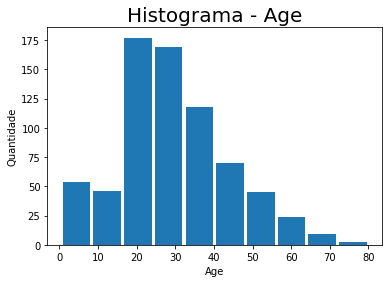

In [18]:
plotar_histograma_atributo(df, "Age")

Existem mais pessoas com idade entre 20 e 40 anos.


Gráfico de Pizza - Valores Nulos - Age


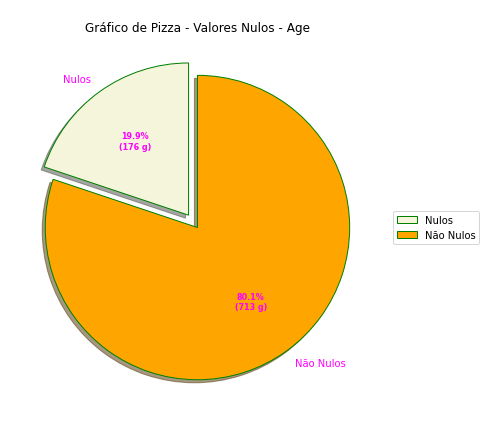

In [19]:
plotar_grafico_de_pizza_nulos(df, "Age")

Possui 176 valores nulos.


Gráfico de Dispersão


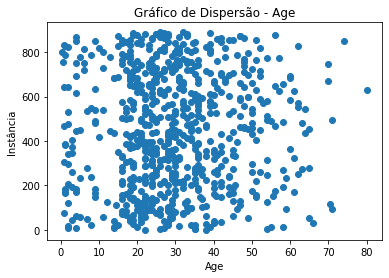

In [20]:
plotar_grafico_de_dispersao_atributo(df, "Age")

Não existem Valores Inconsistentes !

Não existem Valores Aberrantes !


Relação do atributo Age com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


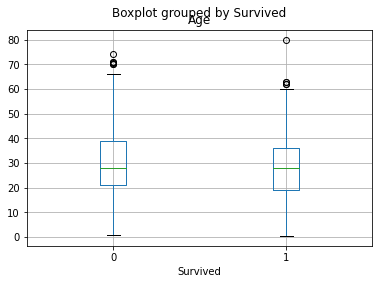

In [21]:
plotar_relacao_atributo_rotulo_bloxplot(df, "Age")


Relação do atributo Age com o Rótulo


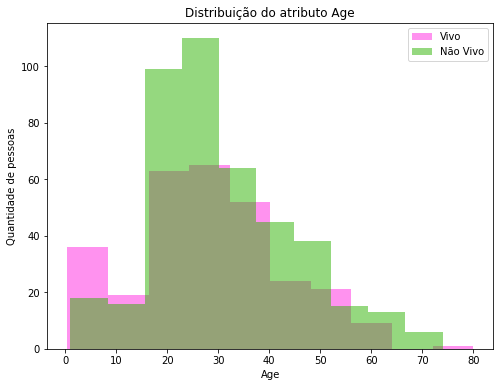

In [22]:
plotar_relacao_atributo_rotulo_barras(df, "Age")

Apesar dos dados estarem bem distribuídos pela idade em relação ao rótulo.
É possível perceber que:
  - A maioria das pessoas de 0 a 15 anos e acima dos 70 anos sobreviveram.
  - A maioria das pessoas nas outras faixa etárias morreram.

Analisar SibSp - Nº de irmãos/cônjuges

In [23]:
analise_estatistica_atributo(df, "SibSp")

Análise Estatística do atributo - SibSp
Valor médio: 0.52
Valor máximo: 8
Valor mínimo: 0
Valor desvio padrão: 1.1
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 1.0


Histograma


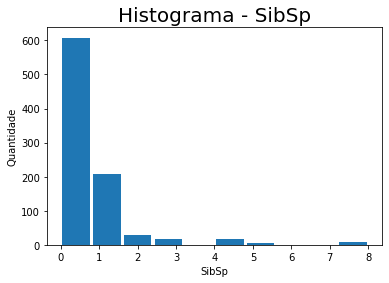

In [24]:
plotar_histograma_atributo(df, "SibSp")

O número de irmãos/ Conjugues estão mais concentrados em valores menores que 2.


Gráfico de Pizza - Valores Nulos - SibSp


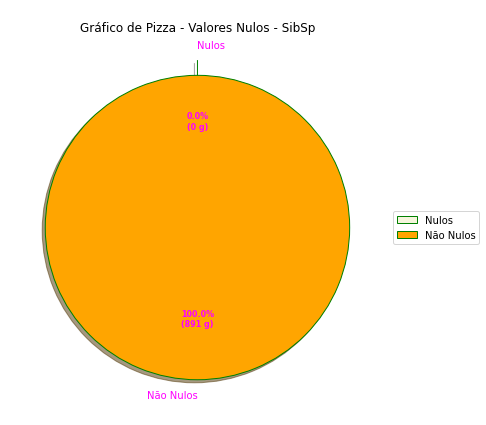

In [25]:
plotar_grafico_de_pizza_nulos(df, "SibSp")

Não possui Valores Nulos.


Gráfico de Dispersão


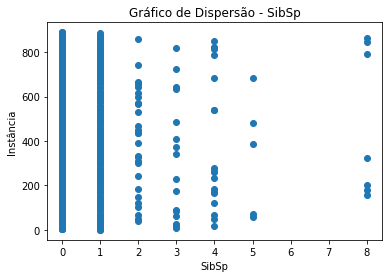

In [26]:
plotar_grafico_de_dispersao_atributo(df, "SibSp")

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !


Relação do atributo SibSp com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


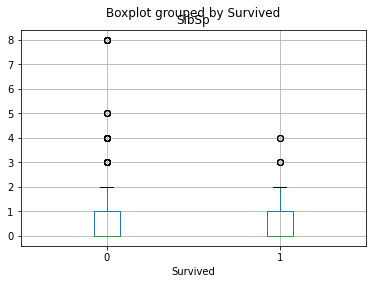

In [27]:
plotar_relacao_atributo_rotulo_bloxplot(df, "SibSp")


Relação do atributo SibSp com o Rótulo


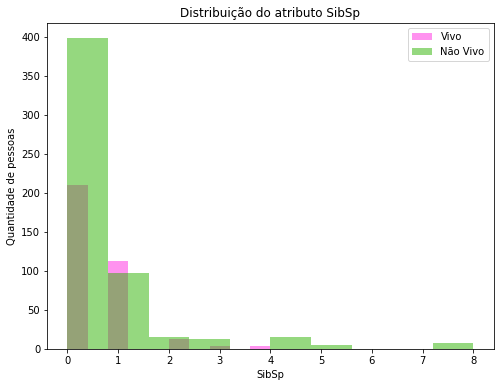

In [28]:
plotar_relacao_atributo_rotulo_barras(df, "SibSp")

É possível perceber que quanto maior o Nº de irmãos/cônjuges de uma pessoa, menor a chance dela sobreviver.

Analisar Parch - Nº de pais/filhos

In [29]:
analise_estatistica_atributo(df, "Parch")

Análise Estatística do atributo - Parch
Valor médio: 0.38
Valor máximo: 6
Valor mínimo: 0
Valor desvio padrão: 0.81
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 0.0


Histograma


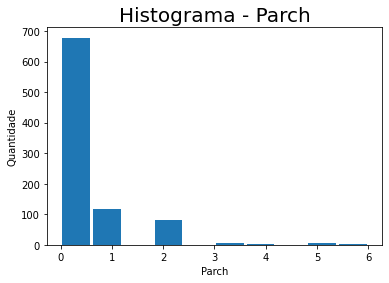

In [30]:
plotar_histograma_atributo(df, "Parch")

O Nº de pais/filhos abordo está mais concentrado em valores menores que 2.


Gráfico de Pizza - Valores Nulos - Parch


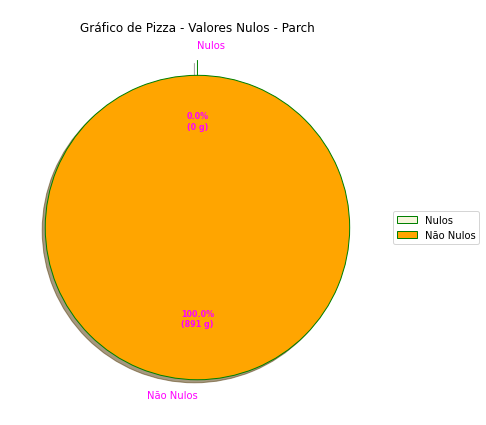

In [31]:
plotar_grafico_de_pizza_nulos(df, "Parch")

Não possui Valores Nulos !


Gráfico de Dispersão


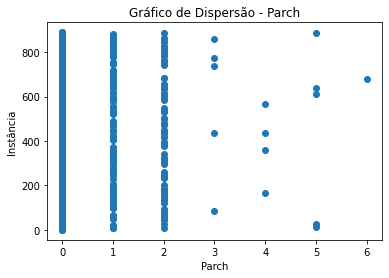

In [32]:
plotar_grafico_de_dispersao_atributo(df, "Parch")

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !


Relação do atributo Parch com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


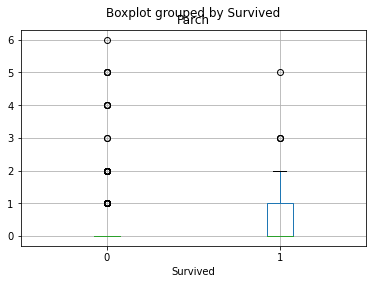

In [33]:
plotar_relacao_atributo_rotulo_bloxplot(df, "Parch")


Relação do atributo Parch com o Rótulo


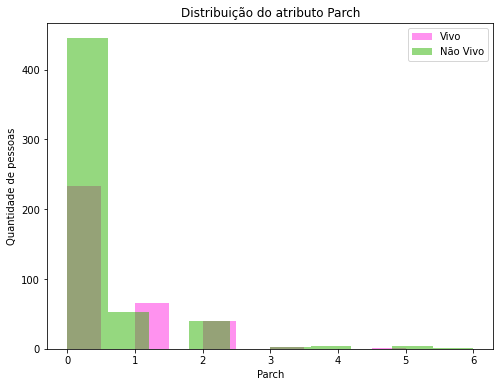

In [34]:
plotar_relacao_atributo_rotulo_barras(df, "Parch")

Percebe-se que pessoas que tem  o Nº de pais/filhos abordo igual a 1, tem mais chances de sobreviverem.

Analisar Fare - Tarifa do passageiro

In [35]:
analise_estatistica_atributo(df, "Fare")

Análise Estatística do atributo - Fare
Valor médio: 32.2
Valor máximo: 512.33
Valor mínimo: 0.0
Valor desvio padrão: 49.69
25% do valores contidos até: 7.91
50% do valores contidos até: 14.45
75% do valores contidos até: 31.0


Histograma


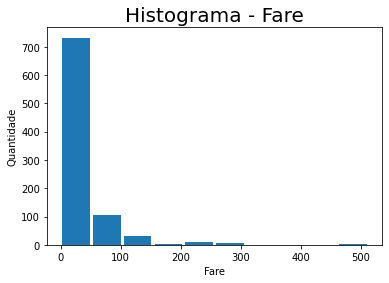

In [36]:
plotar_histograma_atributo(df, "Fare")

Percebe-se que os valores gasto com a tarifa do passageiro estão mais concentrados nos valores menores que 200.


Gráfico de Pizza - Valores Nulos - Fare


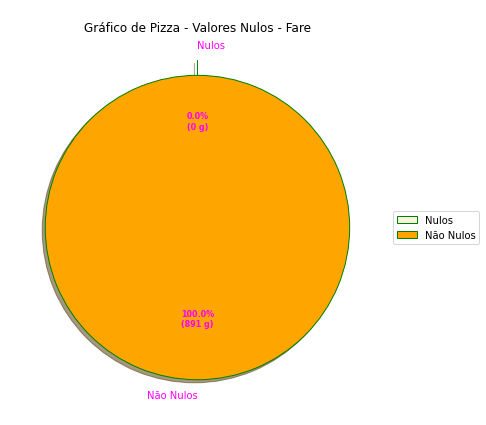

In [37]:
plotar_grafico_de_pizza_nulos(df, "Fare")

Não possui Valores Nulos !


Gráfico de Dispersão


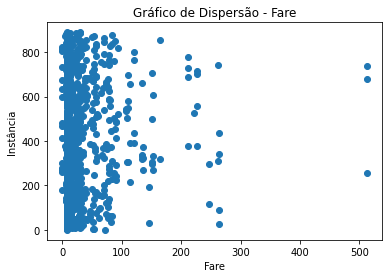

In [38]:
plotar_grafico_de_dispersao_atributo(df, "Fare")

Possui Valores Aberrantes -> Acima de 300.

Não possui Valores Inconsistentes !


Relação do atributo Fare com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


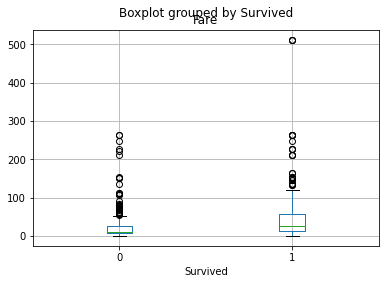

In [39]:
plotar_relacao_atributo_rotulo_bloxplot(df, "Fare")


Relação do atributo Fare com o Rótulo


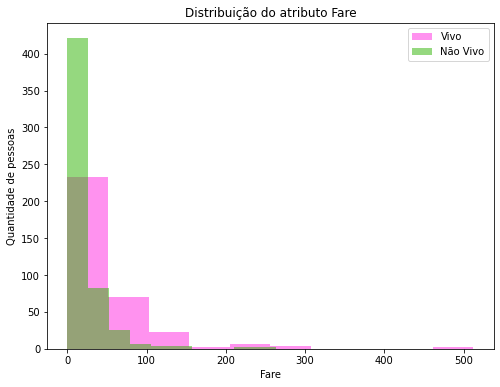

In [40]:
plotar_relacao_atributo_rotulo_barras(df, "Fare")

É possível perceber que quanto maior a tarifa do passageiro, maior é sua chance de sobrevivência.

#Análise dos Atributos Categóricos (binários, ordinais e nominais)

Analisar Id do Passageiro - PassengerId

In [41]:
unicidade(df, "PassengerId")

Unicidade - PassengerId
Quantidades únicas: 891



Gráfico de Pizza - Valores Nulos - PassengerId


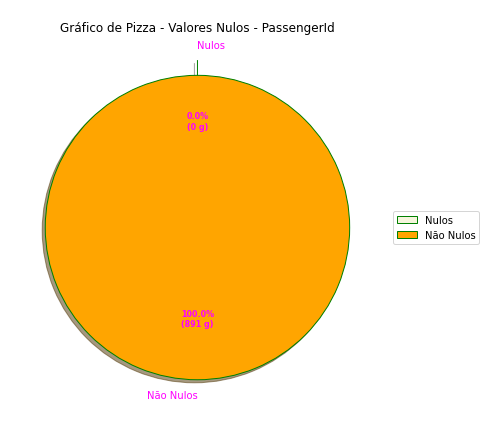

In [42]:
plotar_grafico_de_pizza_nulos(df, "PassengerId")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Analisar Sobrevivencia - Survived

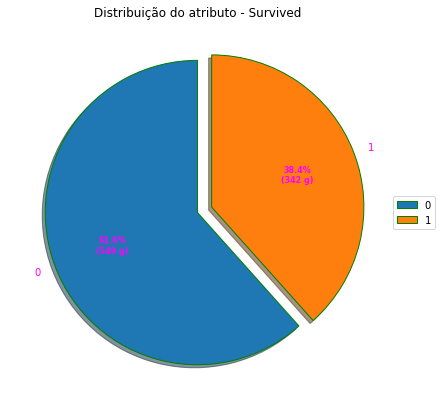

In [43]:
plotar_grafico_de_pizza_nominal(df, "Survived")

Mais pessoas morreram do que sobreviveram.


Gráfico de Pizza - Valores Nulos - Survived


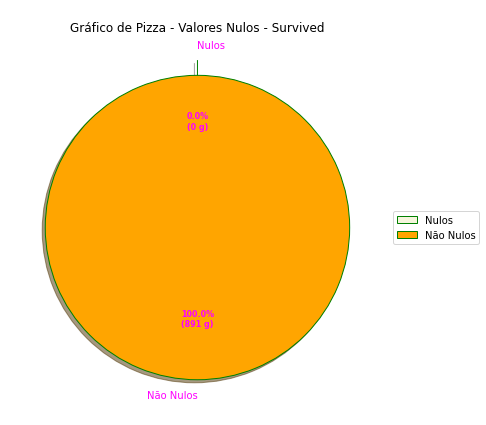

In [44]:
plotar_grafico_de_pizza_nulos(df, "Survived")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Analisar Classe do Bilhete - Pclass

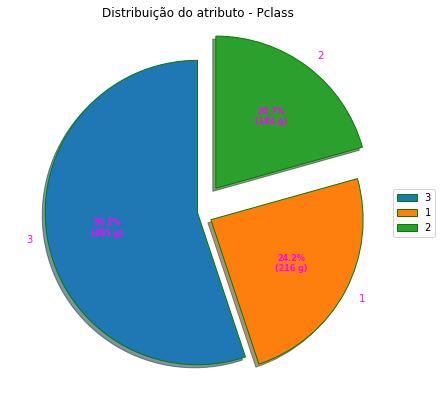

In [45]:
plotar_grafico_de_pizza_nominal(df, "Pclass")

Existem mais pessoas de classe baixa a bordo , depois pessoas de classe alta, e por último pessoas de classe média.


Gráfico de Pizza - Valores Nulos - Pclass


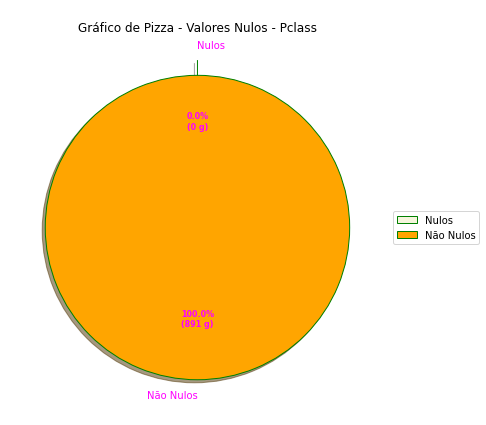

In [46]:
plotar_grafico_de_pizza_nulos(df, "Pclass")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Relação do atributo Pclass  com o Rótulo


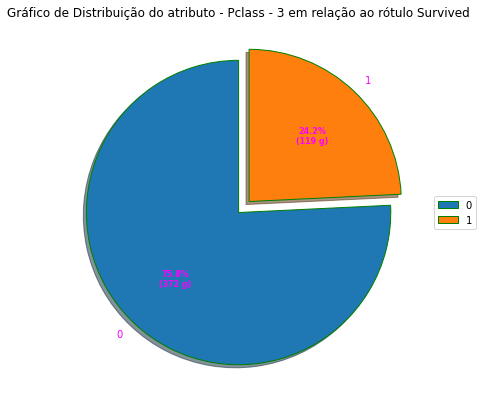

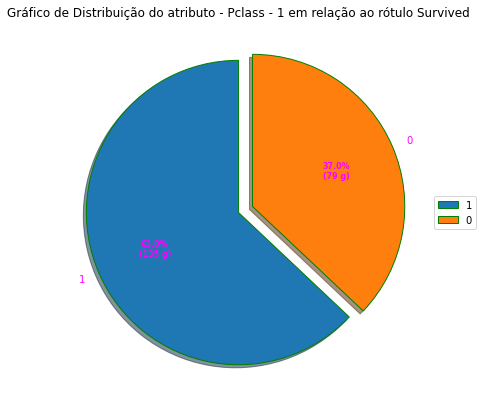

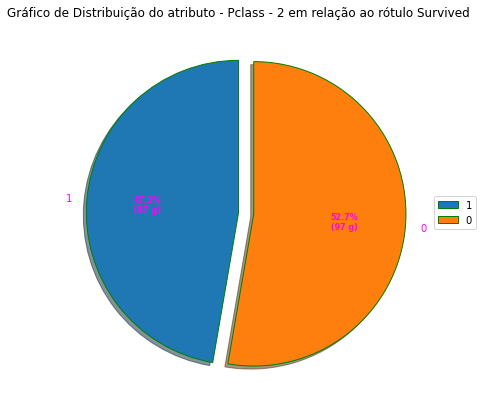

In [47]:
plotar_relacao_atributo_rotulo_pizza(df, "Pclass")

É possível perceber que pessoas que:
 - Pessoas de classe alta tem mais chance de sobreviver do que pessoas de classe média e classe baixa, sendo a classe baixa a classe com menor porcentagem de sobrevivência.

Analisar Nome do Passageiro - Name

In [48]:
unicidade(df, "Name")

Unicidade - Name
Quantidades únicas: 891



Gráfico de Pizza - Valores Nulos - Name


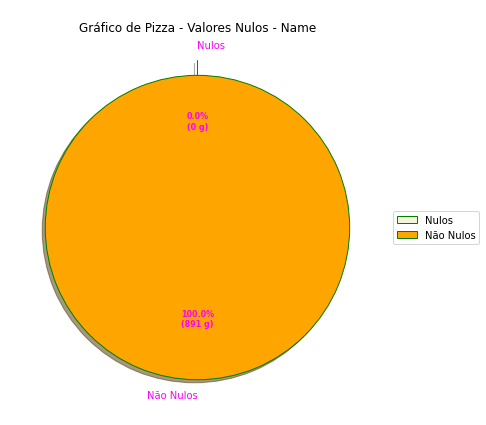

In [49]:
plotar_grafico_de_pizza_nulos(df, "Name")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Analisar Sexo - Sex

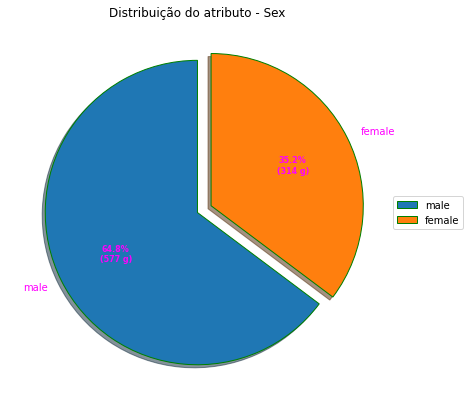

In [50]:
plotar_grafico_de_pizza_nominal(df, "Sex")

Existem mais homens a bordo do que mulheres.


Gráfico de Pizza - Valores Nulos - Sex


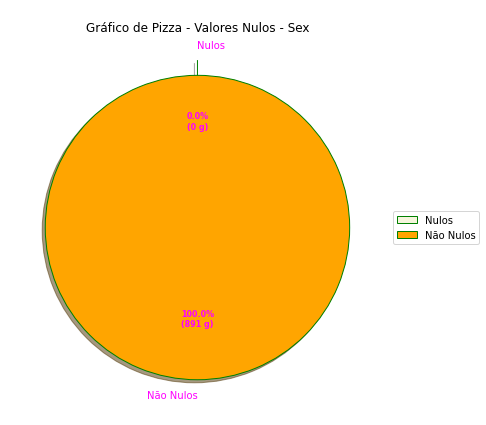

In [51]:
plotar_grafico_de_pizza_nulos(df, "Sex")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Relação do atributo Sex  com o Rótulo


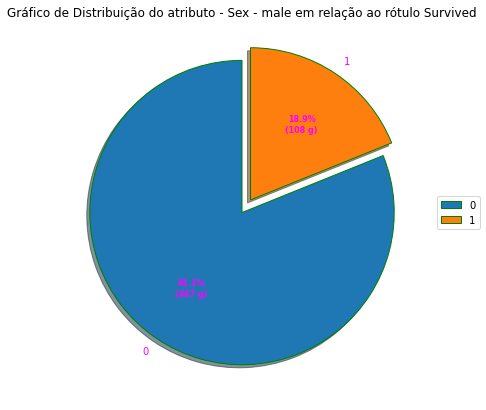

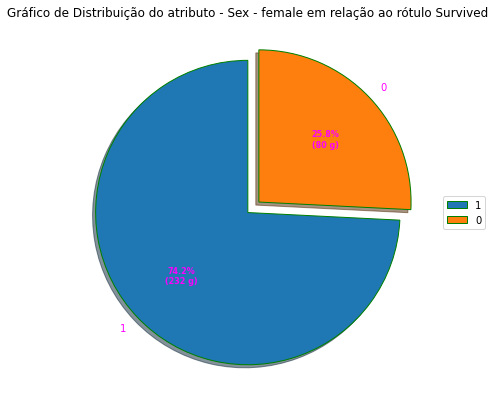

In [52]:
plotar_relacao_atributo_rotulo_pizza(df, "Sex")

Percebe-se que a chance de sobrevivência sendo mulher é muito maior do que sendo homem.

Analisar Número do Bilhete - Ticket

In [53]:
unicidade(df, "Ticket")

Unicidade - Ticket
Quantidades únicas: 681


In [54]:
print(Counter(df.Ticket))

Counter({'347082': 7, '1601': 7, 'CA. 2343': 7, '3101295': 6, 'CA 2144': 6, '347088': 6, '382652': 5, 'S.O.C. 14879': 5, '349909': 4, '347077': 4, '19950': 4, 'W./C. 6608': 4, '4133': 4, 'LINE': 4, '113781': 4, '17421': 4, 'PC 17757': 4, '113760': 4, '2666': 4, '347742': 3, 'SC/Paris 2123': 3, 'PC 17572': 3, 'C.A. 34651': 3, '371110': 3, '230080': 3, '363291': 3, '35273': 3, 'C.A. 31921': 3, '110152': 3, 'PC 17755': 3, '110413': 3, 'PC 17582': 3, 'PC 17760': 3, '13502': 3, '239853': 3, 'F.C.C. 13529': 3, '29106': 3, '345773': 3, '248727': 3, '24160': 3, '113803': 2, '237736': 2, 'PP 9549': 2, '239865': 2, 'PC 17569': 2, 'PC 17604': 2, '113789': 2, '345764': 2, '2651': 2, '11668': 2, '349237': 2, '113572': 2, '36973': 2, '2661': 2, '248738': 2, '364516': 2, '3101278': 2, 'C.A. 2315': 2, '231919': 2, '244367': 2, '35281': 2, '110465': 2, '2665': 2, '2627': 2, 'PC 17558': 2, '2668': 2, '7534': 2, 'PC 17593': 2, '2678': 2, 'STON/O2. 3101279': 2, 'C.A. 33112': 2, '113776': 2, '113505': 2, '


Gráfico de Pizza - Valores Nulos - Ticket


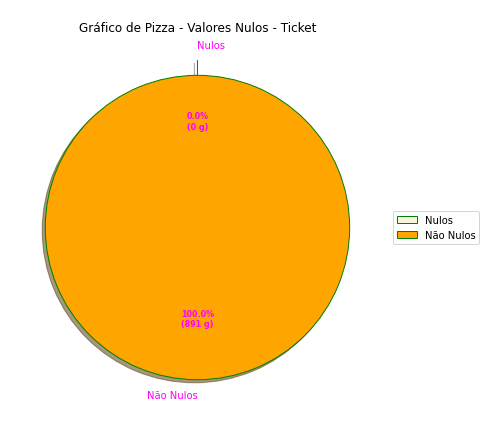

In [55]:
plotar_grafico_de_pizza_nulos(df, "Ticket")

Não possui Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Analisar Cabine - Cabin

In [56]:
unicidade(df, "Cabin")

Unicidade - Cabin
Quantidades únicas: 148



Gráfico de Pizza - Valores Nulos - Cabin


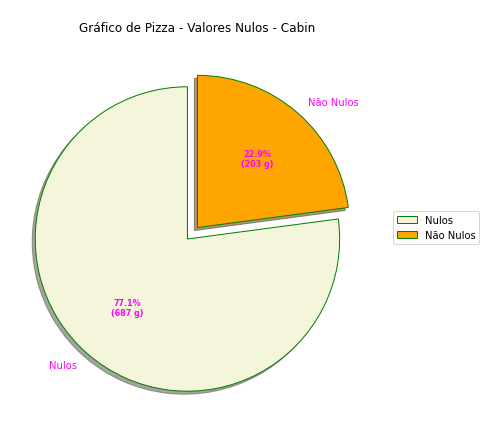

In [57]:
plotar_grafico_de_pizza_nulos(df, "Cabin")

Possui 687 Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Analisar Porto de Embarcação - Embarked

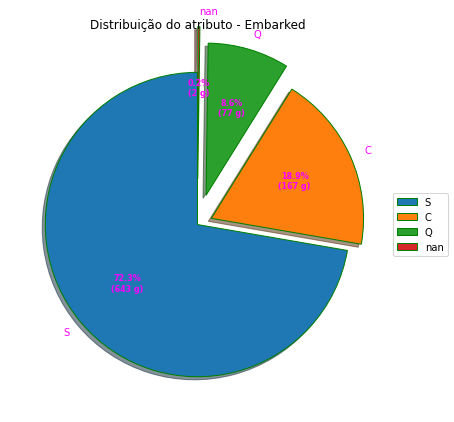

In [58]:
plotar_grafico_de_pizza_nominal(df, "Embarked")

A maioria das pessoas embarcaram no porto S, depois no C, e por fim no Q.


Gráfico de Pizza - Valores Nulos - Embarked


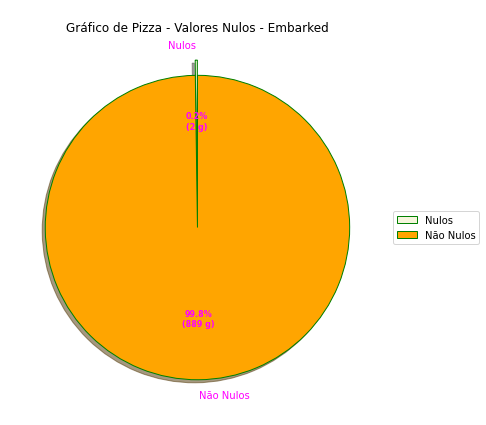

In [59]:
plotar_grafico_de_pizza_nulos(df, "Embarked")

Possui 2 Valores Nulos !

Não possui Valores Aberrantes !

Não possui Valores Inconsitentes !

Relação do atributo Embarked  com o Rótulo


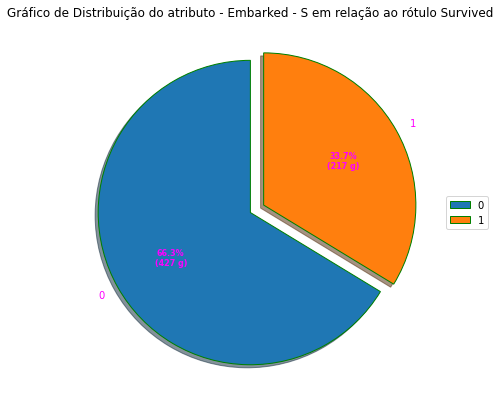

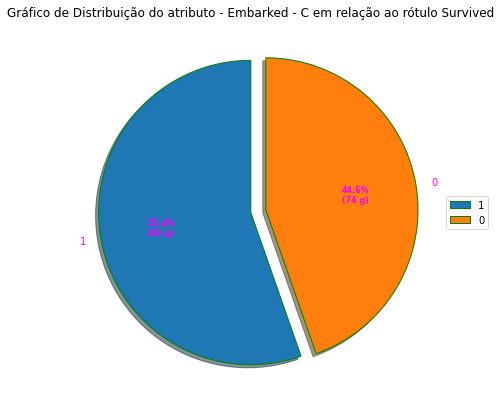

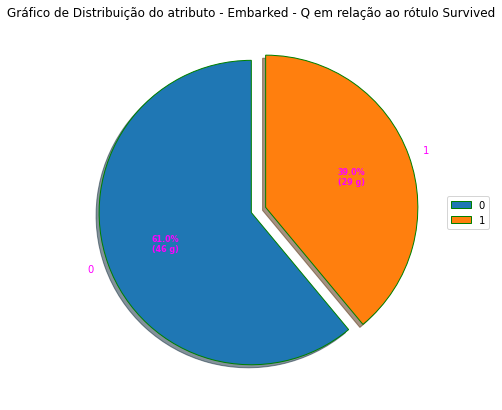

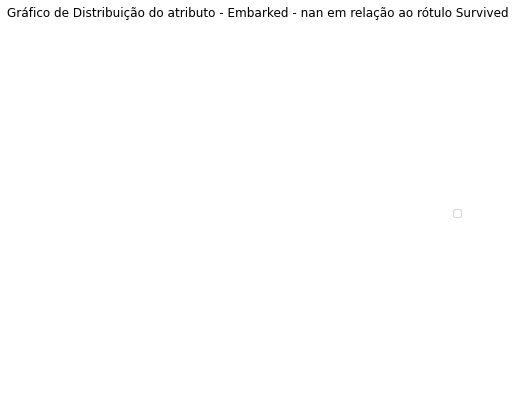

In [60]:
plotar_relacao_atributo_rotulo_pizza(df, "Embarked")

É possível concluir que:
 - Quem embarcou no porto S tem maior chance de estar morto.
 - Quem embarcou no porto C tem maior chance de estar vivo.
 - Quem embarcou no porto Q tem maior chance de estar morto.

# Prévia Correlação entre os atributos

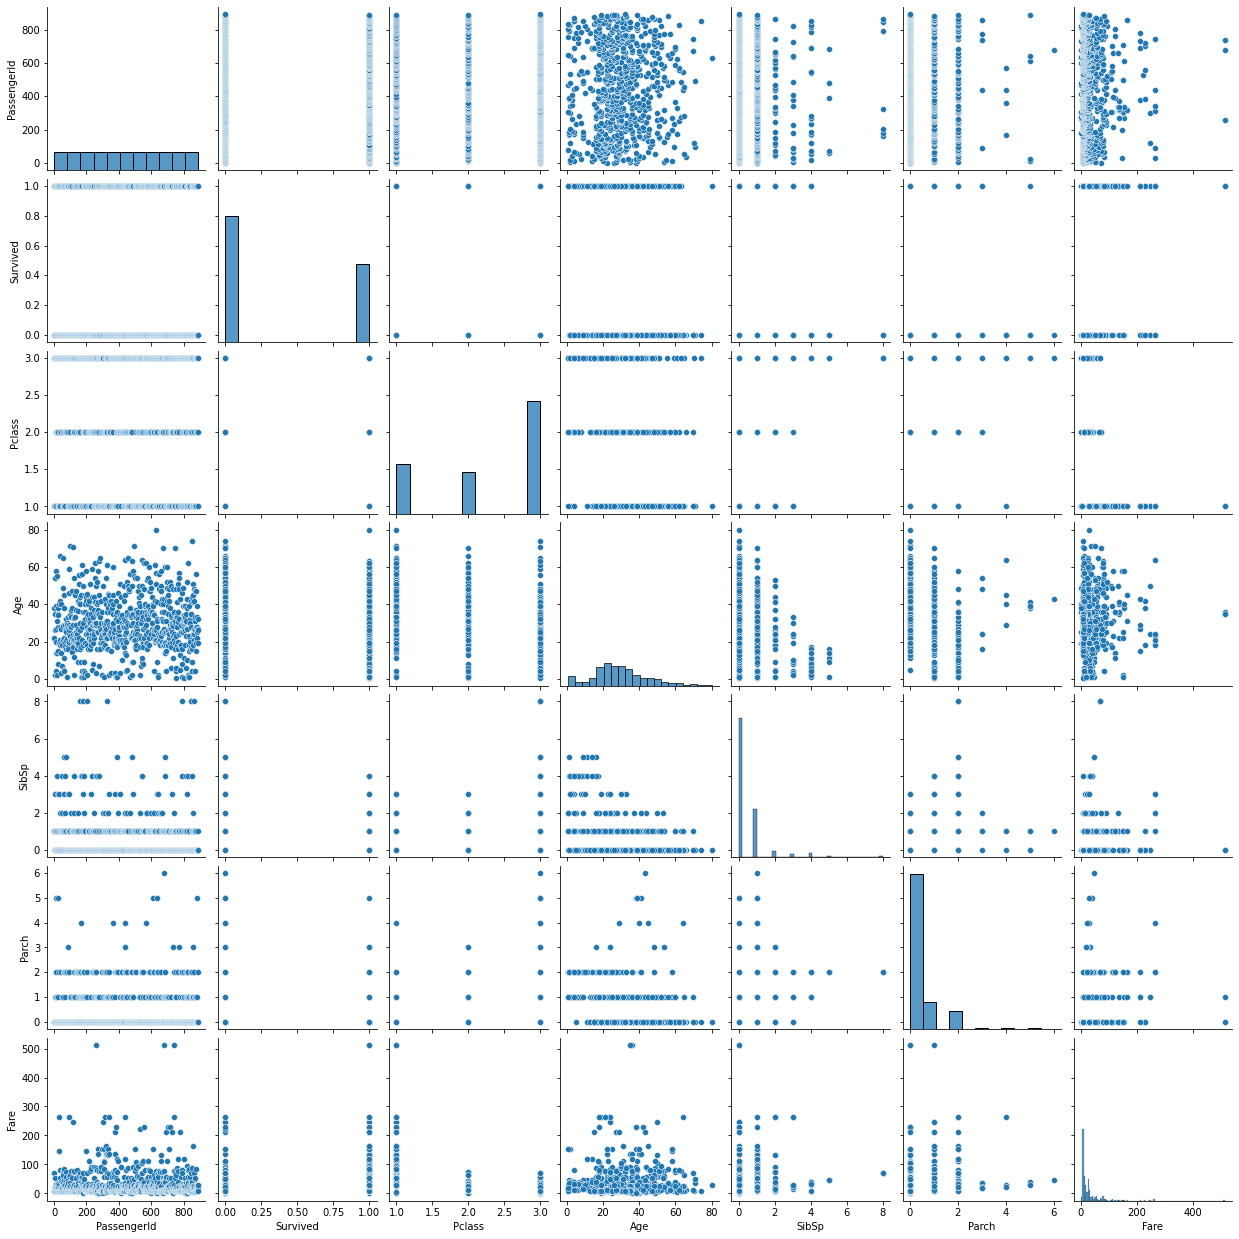

In [61]:
# Impressao da matriz de correlacao dos dados
sns.pairplot(df)

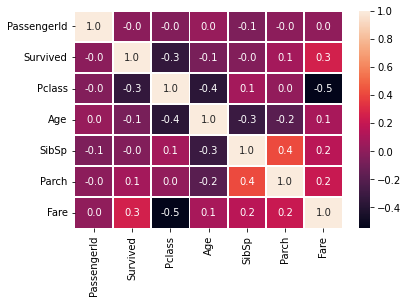

In [62]:
# análise de correlação

correlation = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

A partir da Matriz de Correlação e do Mapa de Calor de Correlação é possível perceber que os atributos em geral possuem baixíssima correlação.

No entanto, a Classe do Bilhete(PClass) e a Tarifa do Passageiro (Fare) possuem correlação moderada, visto que os passageiros que possuem um bilhete de alta classe possuem o valor da tarifa mais elevado.

Outra correlação moderada ocorre entre a Classe do Bilhete(PClass) e a Idade do Passeiro (Age), quanto mais velho o passageiro maior a chance de ele ter um bilhete de alta classe.

Uma última correlação moderada ocorre entre o Nº de irmãos/cônjuges do passageiro (SibSp) e o Nº de pais/filhos do passageiro (Parch), quanto menor o número de irmãos e conjugues de um determinado passageiro, que estão abordo, menor o número de pais ou filhos do mesmo passageiro estarem abordos.

Obs: uma melhor análise da correlação dos atributos pode ser feita após uma discretização dos dados e a realização da transformação dos atributos nominais em númericos juntamente do One Hot Encoding.




#Limpeza e transformação de dados

# Preencher Dados Nulos

Idade tem mais relação com PClass.

Definir Média da Idade Nula de acordo com PClass.

In [63]:
def preenche_nulo_idade(df, valor, pclass):
  for i, idade in enumerate(df.Age):
    if pd.isna(idade) and df.Pclass[i] == pclass:
      df.at[i,"Age"] = valor


In [64]:
#Age
#Cabin
#Embarked

#Age
# Usar media da idade nula de acordo com PClass
media_idade_classe_alta = df[df.Pclass == 1].Age.mean()
preenche_nulo_idade(df, media_idade_classe_alta, 1)

media_idade_classe_media = df[df.Pclass == 2].Age.mean()
preenche_nulo_idade(df, media_idade_classe_media, 2)

media_idade_classe_baixa = df[df.Pclass == 3].Age.mean()
preenche_nulo_idade(df, media_idade_classe_baixa, 3)


#Cabin
# Usar Desconhecida na Cabine
imputer_cabine = SimpleImputer(strategy='constant', fill_value="Desconhecida", missing_values=np.nan)
imputer_cabine = imputer_cabine.fit(df[['Cabin']])
df['Cabin'] = imputer_cabine.transform(df[['Cabin']])
df.head(20)

#Embarked
# Usar Desconhecido no ponto de embarcacao
imputer_embarcacao = SimpleImputer(strategy='constant', fill_value="Desconhecido", missing_values=np.nan)
imputer_embarcacao = imputer_embarcacao.fit(df[['Embarked']])
df['Embarked'] = imputer_embarcacao.transform(df[['Embarked']])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,Desconhecida,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,Desconhecida,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,Desconhecida,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Desconhecida,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,Desconhecida,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,Desconhecida,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,Desconhecida,C


#Suavizar Ruídos

Os ruídos não serão suavizados acreditando na ajuda no processo de classificação.

#Resolver Inconsistências

In [65]:
print("Não tem atributos inconsistentes !")
print("Tentar remover instâncias duplicadas !")

print("Itens Existentes",df.count()[0])

#Remover Duplicador
df.drop_duplicates(inplace=True)
print("Itens Existentes após remoção:",df.count()[0])


print("\nNessa Base de Dados não teve dados Duplicados !")

Não tem atributos inconsistentes !
Tentar remover instâncias duplicadas !
Itens Existentes 891
Itens Existentes após remoção: 891

Nessa Base de Dados não teve dados Duplicados !


#Transformar atributos categóricos nominais e ordinais em um vetor numérico, usando o OneHotEncoder)

Extrair Sobrenome dos nomes.

In [66]:
# Colocar Sobrenome ao invés do nome
def extrair_sobrenome(df):
  nomes = list(df.Name)
  sobrenomes = [nome.split(",")[0] for nome in nomes]
  print(sobrenomes)
  df.drop("Name", axis=1, inplace=True)
  df['Name']=sobrenomes


In [67]:
extrair_sobrenome(df)

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran', 'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell', 'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice', 'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley', 'McGowan', 'Sloper', 'Palsson', 'Asplund', 'Emir', 'Fortune', "O'Dwyer", 'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer', 'Holverson', 'Mamee', 'Cann', 'Vander Planke', 'Nicola-Yarred', 'Ahlin', 'Turpin', 'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll", 'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper', 'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West', 'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart', 'Moubarek', 'Nye', 'Crease', 'Andersson', 'Kink', 'Jenkin', 'Goodwin', 'Hood', 'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell', 'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett', 'Backstrom', 'Ford', 'Slocovski', 'Fortune', 'Celotti', 'Chris

In [68]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


In [69]:
# Contar sobrenomes
print(Counter(df.Name))

Counter({'Andersson': 9, 'Sage': 7, 'Johnson': 6, 'Panula': 6, 'Goodwin': 6, 'Skoog': 6, 'Carter': 6, 'Rice': 5, 'Palsson': 4, 'Williams': 4, 'Asplund': 4, 'Fortune': 4, 'Harper': 4, 'Harris': 4, 'Ford': 4, 'Gustafsson': 4, 'Smith': 4, 'Lefebre': 4, 'Brown': 4, 'Kelly': 4, 'Hart': 4, 'Baclini': 4, 'Moran': 3, 'Vander Planke': 3, 'Meyer': 3, 'Laroche': 3, 'West': 3, 'Johansson': 3, 'Jussila': 3, 'Hickman': 3, 'Boulos': 3, 'Navratil': 3, 'Olsen': 3, 'Goldsmith': 3, "O'Brien": 3, 'Bourke': 3, 'Newell': 3, 'Hoyt': 3, 'Collyer': 3, 'Taussig': 3, 'Graham': 3, 'Allison': 3, 'Elias': 3, 'Davies': 3, 'Richards': 3, 'Van Impe': 3, 'Flynn': 3, 'Thayer': 3, 'Hansen': 3, 'Jensen': 3, 'Braund': 2, 'Futrelle': 2, 'Allen': 2, 'Nasser': 2, 'Sandstrom': 2, 'Holverson': 2, 'Nicola-Yarred': 2, 'Turpin': 2, 'Arnold-Franchi': 2, 'Moubarek': 2, 'Caldwell': 2, 'Backstrom': 2, 'Dean': 2, 'Doling': 2, 'Kantor': 2, 'Petroff': 2, 'White': 2, 'Zabour': 2, 'Attalah': 2, 'Baxter': 2, 'Webber': 2, 'Peter': 2, 'Hakkar

In [70]:
# Utilizado pelo Apriori
df_frequentes = df.copy()

In [71]:
def aprender_labels(df, atributos):
  label_encoders = dict()
  
  for atributo in atributos:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[atributo])
    label_encoders[atributo] = label_encoder

  return label_encoders
  
# Transformar em numérico
def tranformar_em_numerico(df, label_encoders, atributos):
  for atributo in atributos:
    df[atributo] = label_encoders[atributo].transform(df[atributo])
 

In [72]:
atributos_nominais = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
label_encoders = aprender_labels(df, atributos_nominais)
tranformar_em_numerico(df, label_encoders, atributos_nominais)

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,1,0,3,1,22.00000,1,0,523,7.2500,115,3,73
1,2,1,1,0,38.00000,1,0,596,71.2833,81,0,136
2,3,1,3,0,26.00000,0,0,669,7.9250,115,3,251
3,4,1,1,0,35.00000,1,0,49,53.1000,55,3,198
4,5,0,3,1,35.00000,0,0,472,8.0500,115,3,11
5,6,0,3,1,25.14062,0,0,275,8.4583,115,2,409
6,7,0,1,1,54.00000,0,0,85,51.8625,130,3,378
7,8,0,3,1,2.00000,3,1,395,21.0750,115,3,463
8,9,1,3,0,27.00000,0,2,344,11.1333,115,3,292
9,10,1,2,0,14.00000,1,0,132,30.0708,115,0,426


In [73]:
def aprender_one_hot(df, atributos):
  hot_encoders = dict()
  
  for atributo in atributos:
    hot_encoder = preprocessing.OneHotEncoder()
    hot_encoder.fit(df[atributo].values.reshape(-1,1))
    hot_encoders[atributo] = hot_encoder

  return hot_encoders
  
# Transformar em numérico
def tranformar_onehot(df, hot_encoders, label_encoders, atributos):
  for atributo in atributos:
    X = hot_encoders[atributo].transform(df[atributo].values.reshape(-1,1)).toarray()
    #X[1]
    dfOneHot = pd.DataFrame(X, columns= label_encoders[atributo].classes_)
    df = pd.concat([df, dfOneHot], axis=1)
    df.drop([atributo], axis=1, inplace=True)
  return df

In [74]:
# Fazer one hot enconding
atributos_onehot = ["Sex", "Embarked"]
hot_encoders = aprender_one_hot(df, atributos_onehot)

# Fazer o One Hot Enconding
df = tranformar_onehot(df, hot_encoders, label_encoders, atributos_onehot)

# Renomear 
novas_colunas = {"C": "Embarked - C", "Desconhecido": "Embarked - Desconhecido",
                 "Q": "Embarked - Q", "S": "Embarked - S"}

df = df.rename(novas_colunas, axis = 1)
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S
0,1,0,3,22.00000,1,0,523,7.2500,115,73,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,38.00000,1,0,596,71.2833,81,136,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,26.00000,0,0,669,7.9250,115,251,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.00000,1,0,49,53.1000,55,198,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.00000,0,0,472,8.0500,115,11,0.0,1.0,0.0,0.0,0.0,1.0
5,6,0,3,25.14062,0,0,275,8.4583,115,409,0.0,1.0,0.0,0.0,1.0,0.0
6,7,0,1,54.00000,0,0,85,51.8625,130,378,0.0,1.0,0.0,0.0,0.0,1.0
7,8,0,3,2.00000,3,1,395,21.0750,115,463,0.0,1.0,0.0,0.0,0.0,1.0
8,9,1,3,27.00000,0,2,344,11.1333,115,292,1.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,14.00000,1,0,132,30.0708,115,426,1.0,0.0,1.0,0.0,0.0,0.0


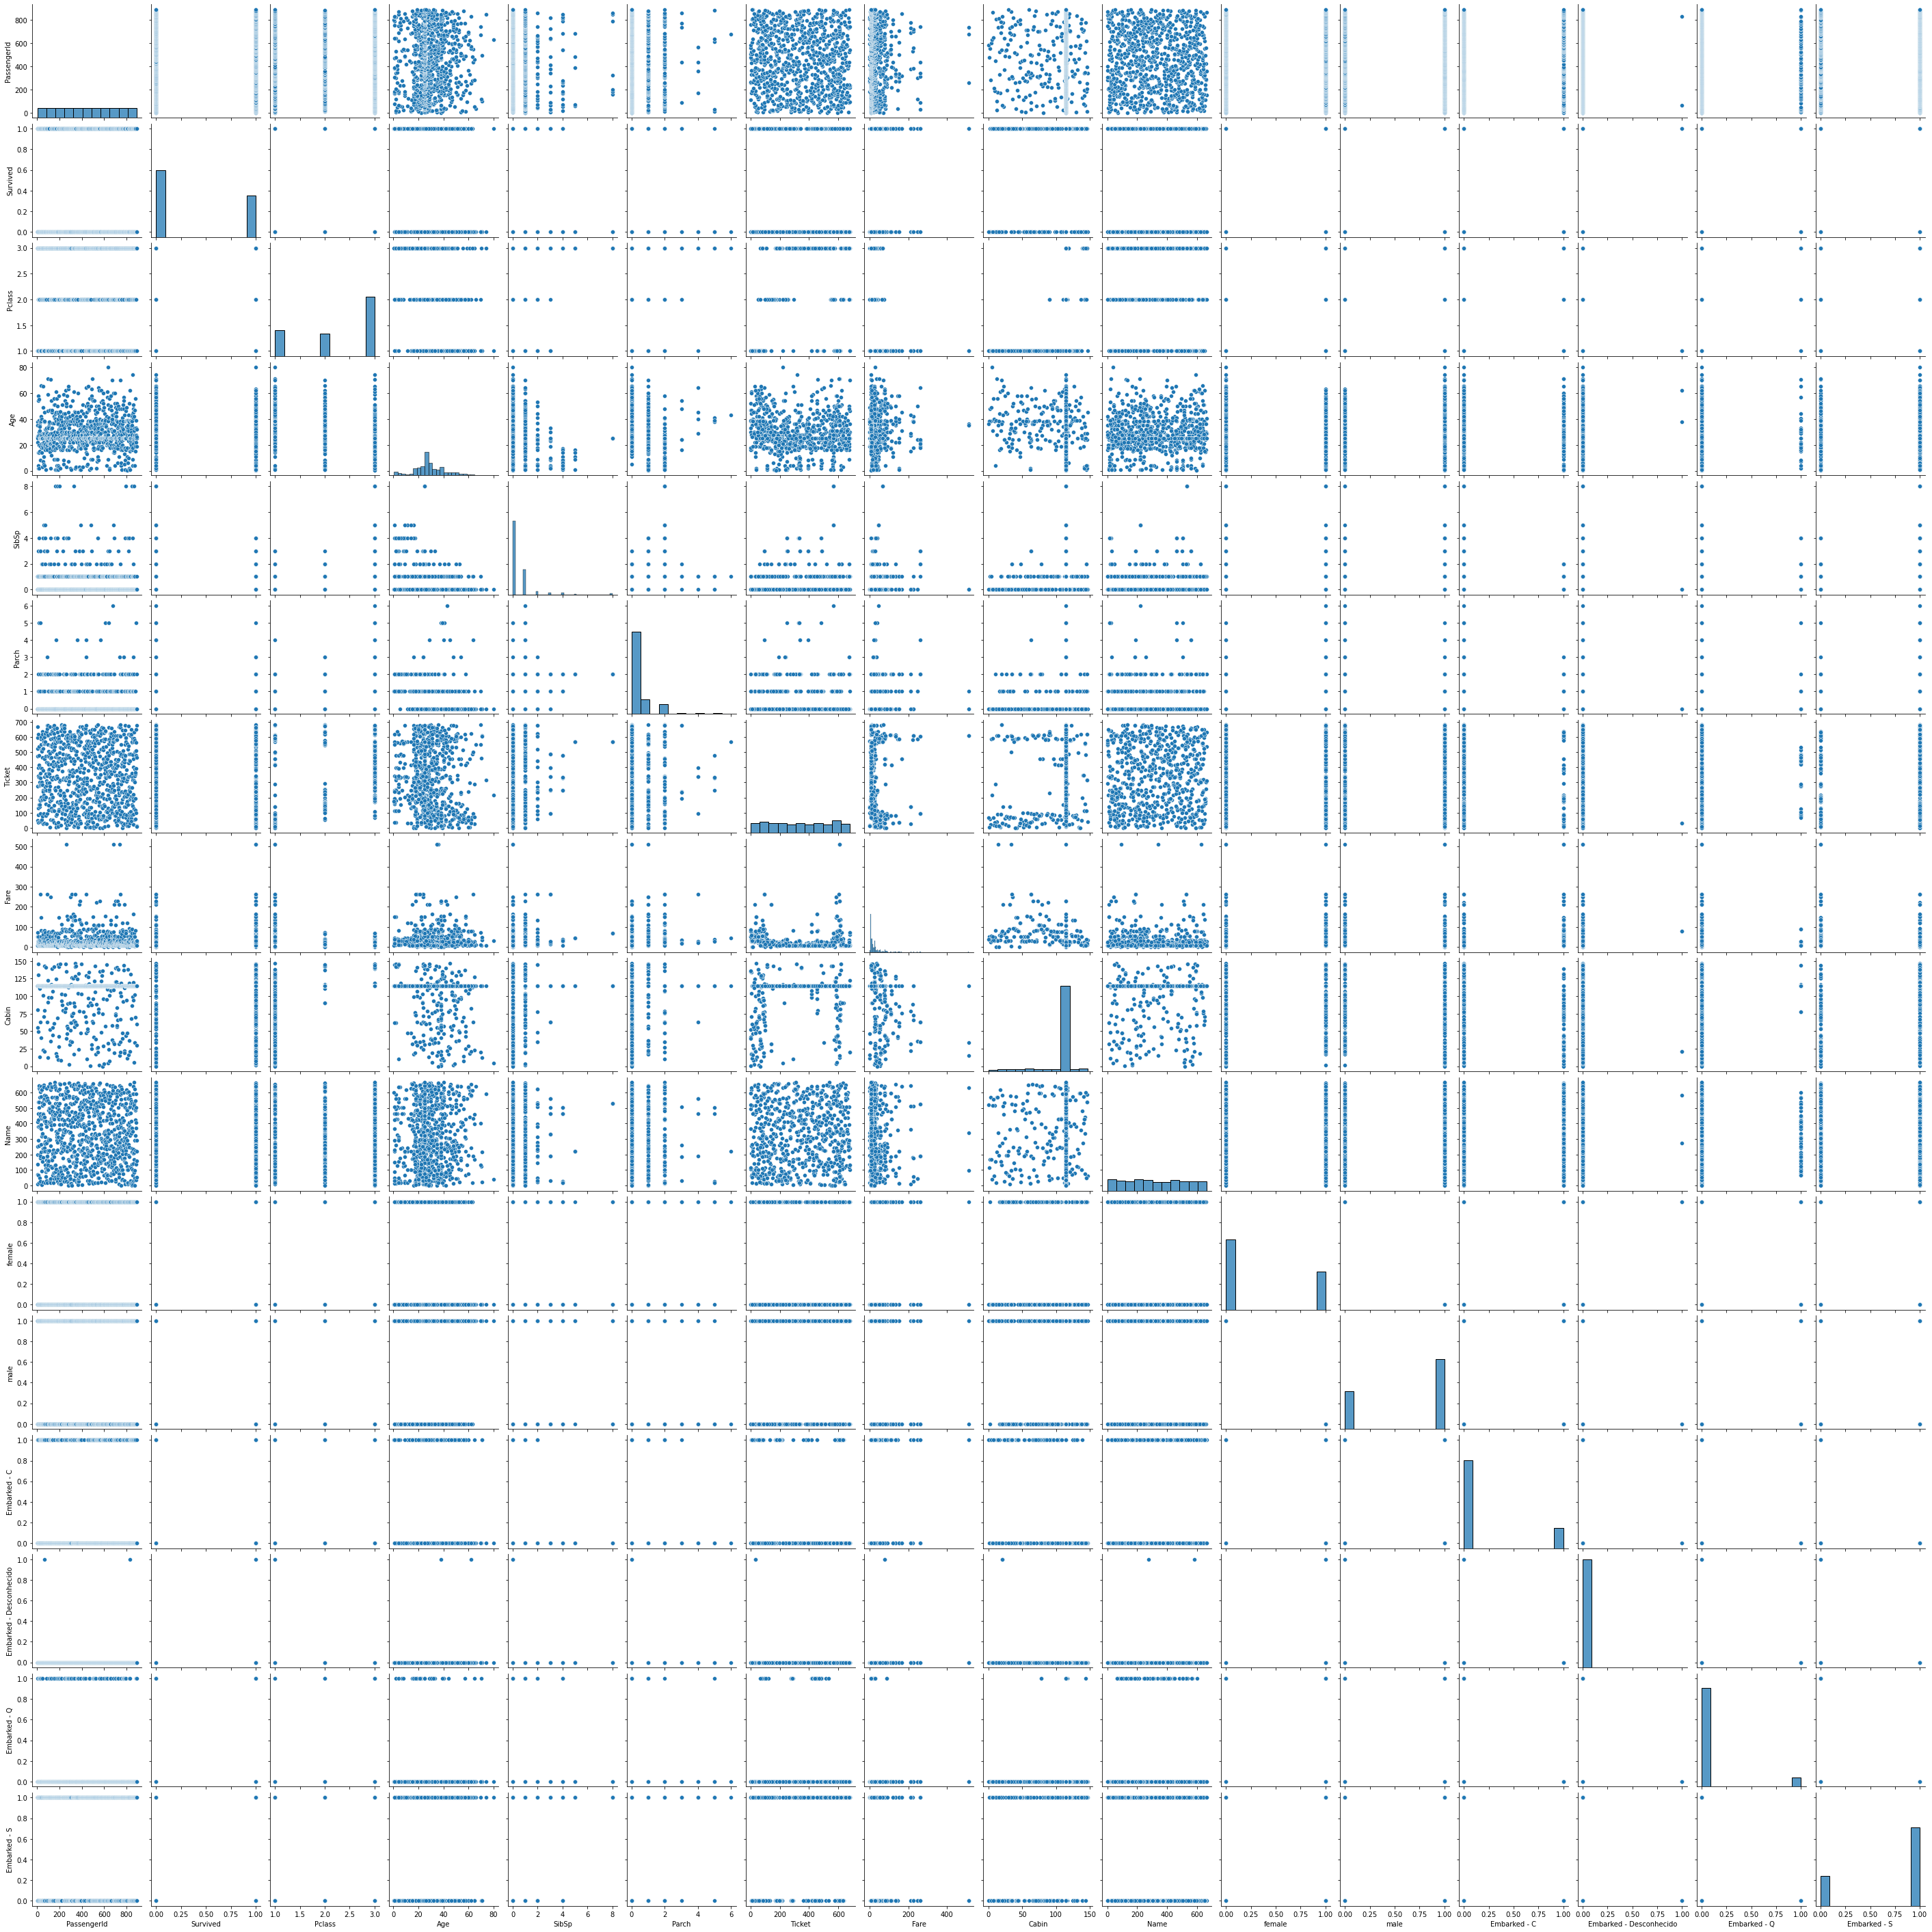

In [75]:
# Impressao da matriz de correlacao dos dados
sns.pairplot(df)

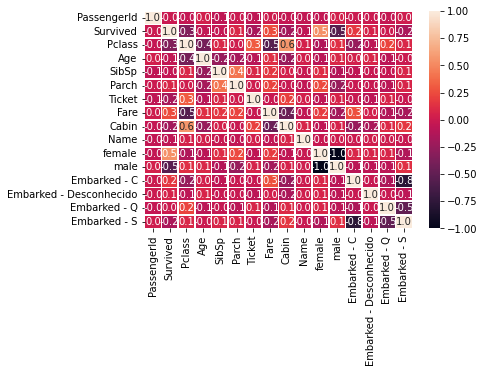

In [76]:
# análise de correlação

correlation = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Nova Correlação Moderada encontrada: entre Cabin e Pclass.

Nova Correlação: entre Cabin e Fare -> O quanto o passageiro gastou está associado a cabine.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


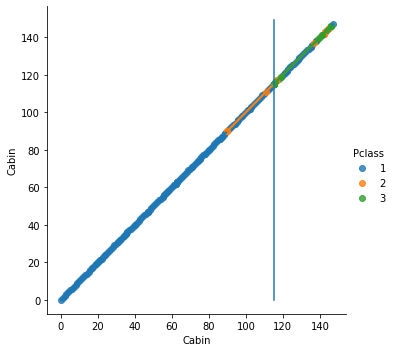

In [77]:
# Analisar Correlações
# Cabine e Pclass - Obs: Cabine : 115 é a Desconhecida
sns.lmplot('Cabin', 'Cabin',hue='Pclass', data=df)
plt.plot([115 for i in range (150)], range(150) )


Gráfico de Dispersão


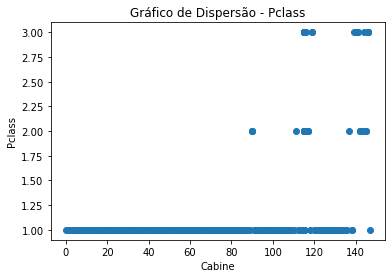

In [78]:
print("\nGráfico de Dispersão")
plt.scatter(df.Cabin, df.Pclass)
plt.xlabel('Cabine')
plt.ylabel('Pclass')
plt.title('Gráfico de Dispersão - Pclass')
plt.show()


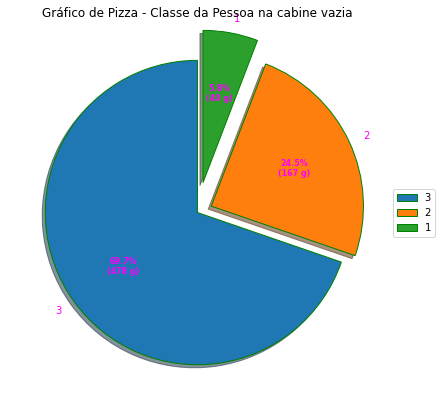

In [79]:
df_cabine_desconhecida = df[df.Cabin == 115]

plotar_grafico_de_pizza_nominal(df_cabine_desconhecida, "Pclass", "Gráfico de Pizza - Classe da Pessoa na cabine vazia")

Percebe-se que o pessoal sem cabine está mais concentrado na classe mais econômica.

# Normalizar os valores de atributos numéricos.

In [80]:
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S
0,1,0,3,22.00000,1,0,523,7.2500,115,73,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,38.00000,1,0,596,71.2833,81,136,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,26.00000,0,0,669,7.9250,115,251,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.00000,1,0,49,53.1000,55,198,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.00000,0,0,472,8.0500,115,11,0.0,1.0,0.0,0.0,0.0,1.0
5,6,0,3,25.14062,0,0,275,8.4583,115,409,0.0,1.0,0.0,0.0,1.0,0.0
6,7,0,1,54.00000,0,0,85,51.8625,130,378,0.0,1.0,0.0,0.0,0.0,1.0
7,8,0,3,2.00000,3,1,395,21.0750,115,463,0.0,1.0,0.0,0.0,0.0,1.0
8,9,1,3,27.00000,0,2,344,11.1333,115,292,1.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,14.00000,1,0,132,30.0708,115,426,1.0,0.0,1.0,0.0,0.0,0.0


In [81]:
#Coloca Survived como ultimo atributo
def coloca_survived_ultimo(df):
  survived = list(df.Survived)

  df.drop("Survived", axis=1, inplace=True)
  df['Survived']=survived

In [82]:
def normalizador(df):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit(df)
  return scaler

In [83]:
def normalizar(df, scaler):
  X = scaler.transform(df)
  df= pd.DataFrame(X, columns=df.columns)
  return df

In [84]:
# Min Max Scaler

coloca_survived_ultimo(df)
aux = df.copy()
df.drop(["Survived"], axis=1, inplace=True)

scaler = normalizador(df)

df = normalizar(df, scaler)
df["Survived"] = aux["Survived"]

df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S,Survived
0,0.000000,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.782313,0.109610,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.001124,0.0,0.472229,0.125,0.0,0.876471,0.139136,0.551020,0.204204,1.0,0.0,1.0,0.0,0.0,0.0,1
2,0.002247,1.0,0.321438,0.000,0.0,0.983824,0.015469,0.782313,0.376877,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.003371,0.0,0.434531,0.125,0.0,0.072059,0.103644,0.374150,0.297297,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.004494,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.782313,0.016517,0.0,1.0,0.0,0.0,0.0,1.0,0


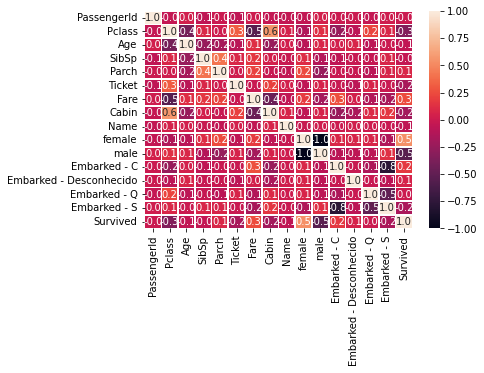

In [85]:
# análise de correlação

correlation = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

# Seleção de Atributos

In [86]:
#Remover PassengerId
df.drop(["PassengerId"], axis=1, inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S,Survived
0,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.782313,0.109610,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,0.472229,0.125,0.0,0.876471,0.139136,0.551020,0.204204,1.0,0.0,1.0,0.0,0.0,0.0,1
2,1.0,0.321438,0.000,0.0,0.983824,0.015469,0.782313,0.376877,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,0.434531,0.125,0.0,0.072059,0.103644,0.374150,0.297297,1.0,0.0,0.0,0.0,0.0,1.0,1
4,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.782313,0.016517,0.0,1.0,0.0,0.0,0.0,1.0,0


# Discretização dos Atributos Numéricos

Remover Atributo Irrelevante - PassagerId

In [87]:
df_frequentes.drop(["PassengerId"], axis=1, inplace=True)

In [88]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,0,3,male,35.0,0,0,373450,8.0500,Desconhecida,S,Allen


Discretizar Idade

In [89]:
bins = [0, 12, 18, 40, 60, df_frequentes.Age.max()+1]

df_frequentes["Age"] = pd.cut(df_frequentes["Age"].to_numpy(), 
                              bins=bins,
                              labels=["Criança", "Adolescente", "Adulto Jovem", "Adulto Velho", "Idoso"])

In [90]:
df_frequentes.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,0,3,male,Adulto Jovem,1,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,1,1,female,Adulto Jovem,1,0,PC 17599,71.2833,C85,C,Cumings
2,1,3,female,Adulto Jovem,0,0,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,1,1,female,Adulto Jovem,1,0,113803,53.1000,C123,S,Futrelle
4,0,3,male,Adulto Jovem,0,0,373450,8.0500,Desconhecida,S,Allen
5,0,3,male,Adulto Jovem,0,0,330877,8.4583,Desconhecida,Q,Moran
6,0,1,male,Adulto Velho,0,0,17463,51.8625,E46,S,McCarthy
7,0,3,male,Criança,3,1,349909,21.0750,Desconhecida,S,Palsson
8,1,3,female,Adulto Jovem,0,2,347742,11.1333,Desconhecida,S,Johnson
9,1,2,female,Adolescente,1,0,237736,30.0708,Desconhecida,C,Nasser


Survived - Tornar mais fácil de entender

In [91]:
rotulos = {0: 'morreu', 1: 'viveu'}
df_frequentes['Survived'] = df_frequentes['Survived'].map(rotulos)

In [92]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,3,male,Adulto Jovem,1,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,viveu,1,female,Adulto Jovem,1,0,PC 17599,71.2833,C85,C,Cumings
2,viveu,3,female,Adulto Jovem,0,0,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,viveu,1,female,Adulto Jovem,1,0,113803,53.1000,C123,S,Futrelle
4,morreu,3,male,Adulto Jovem,0,0,373450,8.0500,Desconhecida,S,Allen


Pclass - Tornar mais fácil de entender

In [93]:
rotulos = {1: 'ClasseAlta', 2: 'ClasseMédia', 3: "ClasseBaixa"}
df_frequentes['Pclass'] = df_frequentes['Pclass'].map(rotulos) 

In [94]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,ClasseBaixa,male,Adulto Jovem,1,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,viveu,ClasseAlta,female,Adulto Jovem,1,0,PC 17599,71.2833,C85,C,Cumings
2,viveu,ClasseBaixa,female,Adulto Jovem,0,0,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,viveu,ClasseAlta,female,Adulto Jovem,1,0,113803,53.1000,C123,S,Futrelle
4,morreu,ClasseBaixa,male,Adulto Jovem,0,0,373450,8.0500,Desconhecida,S,Allen


Discretizar - SibSp

In [95]:
#df_frequentes = df_safe.copy()

In [96]:
bins = [-0.1 ,0.5, 2, 4, df_frequentes.SibSp.max()+1]

df_frequentes["SibSp"] = pd.cut(df_frequentes["SibSp"].to_numpy(), 
                              bins=bins,
                              labels=["Sem Irmãos/Cônjugues", "Poucos Irmãos/Cônjugues", 
                                      "Razoável Irmãos/Cônjugues", "Muitos Irmãos/Cônjugues"])

In [97]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,ClasseBaixa,male,Adulto Jovem,Poucos Irmãos/Cônjugues,0,A/5 21171,7.2500,Desconhecida,S,Braund
1,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,0,PC 17599,71.2833,C85,C,Cumings
2,viveu,ClasseBaixa,female,Adulto Jovem,Sem Irmãos/Cônjugues,0,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,0,113803,53.1000,C123,S,Futrelle
4,morreu,ClasseBaixa,male,Adulto Jovem,Sem Irmãos/Cônjugues,0,373450,8.0500,Desconhecida,S,Allen


Discretizar - Parch

In [98]:
bins = [-0.1 ,0.5, 2, 4, df_frequentes.Parch.max()+1]

df_frequentes["Parch"] = pd.cut(df_frequentes["Parch"].to_numpy(), 
                              bins=bins,
                              labels=["Sem Pais/Filhos", "Poucos Pais/Filhos", 
                                      "Razoável Pais/Filhos", "Muitos Pais/Filhos"])

In [99]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,ClasseBaixa,male,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,A/5 21171,7.2500,Desconhecida,S,Braund
1,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,PC 17599,71.2833,C85,C,Cumings
2,viveu,ClasseBaixa,female,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,STON/O2. 3101282,7.9250,Desconhecida,S,Heikkinen
3,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,113803,53.1000,C123,S,Futrelle
4,morreu,ClasseBaixa,male,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,373450,8.0500,Desconhecida,S,Allen


Discretizar - Fare

In [100]:
bins = [-0.1 ,100, 200, df_frequentes.Fare.max()+1]

df_frequentes["Fare"] = pd.cut(df_frequentes["Fare"].to_numpy(), 
                              bins=bins,
                              labels=["Gasto - Pouco", "Gasto - Médio ", 
                                      "Gasto - Muito"])

In [101]:
df_frequentes.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,ClasseBaixa,male,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,A/5 21171,Gasto - Pouco,Desconhecida,S,Braund
1,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,PC 17599,Gasto - Pouco,C85,C,Cumings
2,viveu,ClasseBaixa,female,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,STON/O2. 3101282,Gasto - Pouco,Desconhecida,S,Heikkinen
3,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,113803,Gasto - Pouco,C123,S,Futrelle
4,morreu,ClasseBaixa,male,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,373450,Gasto - Pouco,Desconhecida,S,Allen
5,morreu,ClasseBaixa,male,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,330877,Gasto - Pouco,Desconhecida,Q,Moran
6,morreu,ClasseAlta,male,Adulto Velho,Sem Irmãos/Cônjugues,Sem Pais/Filhos,17463,Gasto - Pouco,E46,S,McCarthy
7,morreu,ClasseBaixa,male,Criança,Razoável Irmãos/Cônjugues,Poucos Pais/Filhos,349909,Gasto - Pouco,Desconhecida,S,Palsson
8,viveu,ClasseBaixa,female,Adulto Jovem,Sem Irmãos/Cônjugues,Poucos Pais/Filhos,347742,Gasto - Pouco,Desconhecida,S,Johnson
9,viveu,ClasseMédia,female,Adolescente,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,237736,Gasto - Pouco,Desconhecida,C,Nasser


In [102]:
df_frequentes.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       891
Embarked    891
Name        891
dtype: int64

# Encontrar Regras de Transações

Remover Espaços Antes de Depois dos atributos

In [103]:
for atributo in df_frequentes.columns:
  df_frequentes[atributo] = df_frequentes[atributo].str.strip()

In [104]:
df_frequentes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,morreu,ClasseBaixa,male,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,A/5 21171,Gasto - Pouco,Desconhecida,S,Braund
1,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,PC 17599,Gasto - Pouco,C85,C,Cumings
2,viveu,ClasseBaixa,female,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,STON/O2. 3101282,Gasto - Pouco,Desconhecida,S,Heikkinen
3,viveu,ClasseAlta,female,Adulto Jovem,Poucos Irmãos/Cônjugues,Sem Pais/Filhos,113803,Gasto - Pouco,C123,S,Futrelle
4,morreu,ClasseBaixa,male,Adulto Jovem,Sem Irmãos/Cônjugues,Sem Pais/Filhos,373450,Gasto - Pouco,Desconhecida,S,Allen


In [105]:
df_safe = df_frequentes.copy()

Transformar cada instância da base para o formato transacional

In [106]:
transactions = []
for i in range(0, len(df_frequentes)):
    transactions.append([str(df_frequentes.values[i,j]) for j in range(0, len(df_frequentes.columns))])

In [107]:
transactions[0]

['morreu',
 'ClasseBaixa',
 'male',
 'Adulto Jovem',
 'Poucos Irmãos/Cônjugues',
 'Sem Pais/Filhos',
 'A/5 21171',
 'Gasto - Pouco',
 'Desconhecida',
 'S',
 'Braund']

Codificar o One Hot para utilizar o apriori

In [108]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,110152,110413,110465,110564,110813,111240,111320,111361,111369,111426,...,de Messemaeker,de Mulder,de Pelsmaeker,del Carlo,female,male,morreu,van Billiard,van Melkebeke,viveu
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [109]:
frequent_itemsets = apriori(onehot, min_support=0.07, use_colnames=True)

In [110]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [111]:
rules.head(1000)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adulto Jovem),(ClasseBaixa),0.675645,0.551066,0.400673,0.593023,1.076138,0.028348,1.103094
1,(ClasseBaixa),(Adulto Jovem),0.551066,0.675645,0.400673,0.727088,1.076138,0.028348,1.188494
2,(Adulto Jovem),(Desconhecida),0.675645,0.771044,0.546577,0.808970,1.049188,0.025625,1.198536
3,(Desconhecida),(Adulto Jovem),0.771044,0.675645,0.546577,0.708879,1.049188,0.025625,1.114158
4,(Gasto - Pouco),(Adulto Jovem),0.940516,0.675645,0.640853,0.681384,1.008494,0.005398,1.018012
...,...,...,...,...,...,...,...,...,...
995,"(Sem Irmãos/Cônjugues, Sem Pais/Filhos)",(Gasto - Pouco),0.602694,0.940516,0.584736,0.970205,1.031566,0.017893,1.996423
996,"(Gasto - Pouco, Sem Pais/Filhos)",(Sem Irmãos/Cônjugues),0.732884,0.682379,0.584736,0.797856,1.169227,0.084631,1.571260
997,(Sem Irmãos/Cônjugues),"(Gasto - Pouco, Sem Pais/Filhos)",0.682379,0.732884,0.584736,0.856908,1.169227,0.084631,1.866739
998,(Gasto - Pouco),"(Sem Irmãos/Cônjugues, Sem Pais/Filhos)",0.940516,0.602694,0.584736,0.621718,1.031566,0.017893,1.050293


In [112]:
# rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

rules[ (rules['confidence'] >= 0.90) & (rules['support'] >= 0.75)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,(Desconhecida),(Gasto - Pouco),0.771044,0.940516,0.75982,0.985444,1.047769,0.034641,4.086532


Com mais de 90% de confiança e 75% de suporte:

  - Se uma pessoa ficou em uma cabine desconhecida, ou seja, pode ser uma pessoa sem cabine, então essa pessoas gastou pouco.

In [113]:
rules[ (rules['confidence'] >= 0.95) & (rules['support'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,(Desconhecida),(Gasto - Pouco),0.771044,0.940516,0.759820,0.985444,1.047769,0.034641,4.086532
80,(S),(Gasto - Pouco),0.722783,0.940516,0.695847,0.962733,1.023622,0.016058,1.596147
82,(Sem Irmãos/Cônjugues),(Gasto - Pouco),0.682379,0.940516,0.652076,0.955592,1.016029,0.010287,1.339485
85,(Sem Pais/Filhos),(Gasto - Pouco),0.760943,0.940516,0.732884,0.963127,1.024041,0.017205,1.613199
86,(male),(Gasto - Pouco),0.647587,0.940516,0.626263,0.967071,1.028234,0.017197,1.806427
89,(morreu),(Gasto - Pouco),0.616162,0.940516,0.600449,0.974499,1.036132,0.020939,2.332612


Com mais de 95% de confiança e 60% de suporte:

  - Se uma pessoa morreu então ela gastou pouco.
  - Se a pessoa é um homem então ela gastou pouco.

In [114]:
rules[ (rules['lift'] >= 4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(Criança),(Poucos Pais/Filhos),0.077441,0.222222,0.074074,0.956522,4.304348,0.056865,17.888889
63,(Poucos Pais/Filhos),(Criança),0.222222,0.077441,0.074074,0.333333,4.304348,0.056865,1.383838
796,"(Gasto - Pouco, Criança)",(Poucos Pais/Filhos),0.074074,0.222222,0.070707,0.954545,4.295455,0.054246,17.111111
797,"(Gasto - Pouco, Poucos Pais/Filhos)",(Criança),0.191919,0.077441,0.070707,0.368421,4.757437,0.055845,1.460718
800,(Criança),"(Gasto - Pouco, Poucos Pais/Filhos)",0.077441,0.191919,0.070707,0.913043,4.757437,0.055845,9.292929
801,(Poucos Pais/Filhos),"(Gasto - Pouco, Criança)",0.222222,0.074074,0.070707,0.318182,4.295455,0.054246,1.358025


Analisando o lift, se a pessoa tiver poucos pais/filhos, aumenta muito a chance dessa pessoas ser criança.

# Classificação

Importações

In [115]:
# Importações
#Modelos de aprendizado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


#Validacao cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Organizar Dados de treino

In [116]:
# Base de Treino
df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S,Survived
0,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.782313,0.109610,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,0.472229,0.125,0.0,0.876471,0.139136,0.551020,0.204204,1.0,0.0,1.0,0.0,0.0,0.0,1
2,1.0,0.321438,0.000,0.0,0.983824,0.015469,0.782313,0.376877,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,0.434531,0.125,0.0,0.072059,0.103644,0.374150,0.297297,1.0,0.0,0.0,0.0,0.0,1.0,1
4,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.782313,0.016517,0.0,1.0,0.0,0.0,0.0,1.0,0


In [117]:
# Dados de treino
train_x = df.values[:,:-1]
train_y = df.values[:, -1]

print(train_x.shape, train_y.shape)

(891, 14) (891,)


Organizar Dados de teste

In [118]:
# Ler dados de teste
df = pd.read_csv("test.csv")

# Tamanho da base de Dados
tamanho_do_df = len(df.index)
print("Tamanho da base de teste:", tamanho_do_df)

print("Algumas instâncias da base de teste:")
df.head()

Tamanho da base de teste: 418
Algumas instâncias da base de teste:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
# Verificar se tem dados nulos
df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [120]:
# Prencher dados nulos em Cabine

df['Cabin'] = imputer_cabine.transform(df[['Cabin']])

df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin          418
Embarked       418
dtype: int64

In [121]:
# Prencher dados nulos em Idade

preenche_nulo_idade(df, media_idade_classe_alta, 1)

preenche_nulo_idade(df, media_idade_classe_media, 2)

preenche_nulo_idade(df, media_idade_classe_media, 3)

df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin          418
Embarked       418
dtype: int64

In [122]:
# Prencher dados nulos em Fare
classe = int(df[pd.isna(df.Fare)]["Pclass"]) # Classe 3

if classe == 1:
  df["Fare"].fillna(300, inplace=True)
elif classe == 2:
  df["Fare"].fillna(100, inplace=True)
else: # classe 3
  df["Fare"].fillna(0, inplace=True)

df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

In [123]:
# Colocar Sobrenome ao invés do nome
extrair_sobrenome(df)
df.head()

['Kelly', 'Wilkes', 'Myles', 'Wirz', 'Hirvonen', 'Svensson', 'Connolly', 'Caldwell', 'Abrahim', 'Davies', 'Ilieff', 'Jones', 'Snyder', 'Howard', 'Chaffee', 'del Carlo', 'Keane', 'Assaf', 'Ilmakangas', 'Assaf Khalil', 'Rothschild', 'Olsen', 'Flegenheim', 'Williams', 'Ryerson', 'Robins', 'Ostby', 'Daher', 'Brady', 'Samaan', 'Louch', 'Jefferys', 'Dean', 'Johnston', 'Mock', 'Katavelas', 'Roth', 'Cacic', 'Sap', 'Hee', 'Karun', 'Franklin', 'Goldsmith', 'Corbett', 'Kimball', 'Peltomaki', 'Chevre', 'Shaughnessy', 'Bucknell', 'Coutts', 'Smith', 'Pulbaum', 'Hocking', 'Fortune', 'Mangiavacchi', 'Rice', 'Cor', 'Abelseth', 'Davison', 'Chaudanson', 'Dika', 'McCrae', 'Bjorklund', 'Bradley', 'Ryerson', 'Corey', 'Burns', 'Moore', 'Tucker', 'Fortune', 'Mulvihill', 'Minkoff', 'Nieminen', 'Ovies y Rodriguez', 'Geiger', 'Keeping', 'Miles', 'Cornell', 'Aldworth', 'Doyle', 'Boulos', 'Straus', 'Case', 'Demetri', 'Lamb', 'Khalil', 'Barry', 'Badman', "O'Donoghue", 'Wells', 'Dyker', 'Pedersen', 'Davidson', 'Gues

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,892,3,male,34.5,0,0,330911,7.8292,Desconhecida,Q,Kelly
1,893,3,female,47.0,1,0,363272,7.0000,Desconhecida,S,Wilkes
2,894,2,male,62.0,0,0,240276,9.6875,Desconhecida,Q,Myles
3,895,3,male,27.0,0,0,315154,8.6625,Desconhecida,S,Wirz
4,896,3,female,22.0,1,1,3101298,12.2875,Desconhecida,S,Hirvonen


In [124]:
def realizar_label_encoder(atributo, label_encoders, novo_valor="Desconhecido"):
  df[atributo] = df[atributo].map(lambda valor: novo_valor if valor not in label_encoders[atributo].classes_ else valor)
  le_dict = dict(zip(label_encoders[atributo].classes_, label_encoders[atributo].transform(label_encoders[atributo].classes_)))
  if le_dict.get(novo_valor, "NaoAchou") == "NaoAchou":
    le_dict[novo_valor] = max(le_dict.values()) +1

  df[atributo] = df[atributo].map(lambda valor: le_dict[valor]) # Fazer Label Encoder)

In [125]:
# Realizar Label Encoder na base teste
atributos_nominais = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]


realizar_label_encoder("Cabin", label_encoders, novo_valor="Desconhecida")

realizar_label_encoder("Name", label_encoders)
realizar_label_encoder("Sex", label_encoders)
realizar_label_encoder("Ticket", label_encoders)
realizar_label_encoder("Embarked", label_encoders)

df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,892,3,1,34.5,0,0,681,7.8292,115,2,306
1,893,3,0,47.0,1,0,681,7.0000,115,3,667
2,894,2,1,62.0,0,0,681,9.6875,115,2,667
3,895,3,1,27.0,0,0,681,8.6625,115,3,667
4,896,3,0,22.0,1,1,251,12.2875,115,3,259


In [126]:
# Realizar One Hot Encoder na base teste
atributos_onehot = ["Sex", "Embarked"]

df = tranformar_onehot(df, hot_encoders, label_encoders, atributos_onehot)

# Renomear 
novas_colunas = {"C": "Embarked - C", "Desconhecido": "Embarked - Desconhecido",
                 "Q": "Embarked - Q", "S": "Embarked - S"}

df = df.rename(novas_colunas, axis = 1)
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S
0,892,3,34.5,0,0,681,7.8292,115,306,0.0,1.0,0.0,0.0,1.0,0.0
1,893,3,47.0,1,0,681,7.0000,115,667,1.0,0.0,0.0,0.0,0.0,1.0
2,894,2,62.0,0,0,681,9.6875,115,667,0.0,1.0,0.0,0.0,1.0,0.0
3,895,3,27.0,0,0,681,8.6625,115,667,0.0,1.0,0.0,0.0,0.0,1.0
4,896,3,22.0,1,1,251,12.2875,115,259,1.0,0.0,0.0,0.0,0.0,1.0


In [127]:
# Normalizar Base teste

df = normalizar(df, scaler)

df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S
0,1.001124,1.0,0.428248,0.000,0.000000,1.001471,0.015282,0.782313,0.459459,0.0,1.0,0.0,0.0,1.0,0.0
1,1.002247,1.0,0.585323,0.125,0.000000,1.001471,0.013663,0.782313,1.001502,1.0,0.0,0.0,0.0,0.0,1.0
2,1.003371,0.5,0.773813,0.000,0.000000,1.001471,0.018909,0.782313,1.001502,0.0,1.0,0.0,0.0,1.0,0.0
3,1.004494,1.0,0.334004,0.000,0.000000,1.001471,0.016908,0.782313,1.001502,0.0,1.0,0.0,0.0,0.0,1.0
4,1.005618,1.0,0.271174,0.125,0.166667,0.369118,0.023984,0.782313,0.388889,1.0,0.0,0.0,0.0,0.0,1.0


In [128]:
# Fazer seleção de atributos base teste
df.drop(["PassengerId"], axis=1, inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name,female,male,Embarked - C,Embarked - Desconhecido,Embarked - Q,Embarked - S
0,1.0,0.428248,0.000,0.000000,1.001471,0.015282,0.782313,0.459459,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.585323,0.125,0.000000,1.001471,0.013663,0.782313,1.001502,1.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.773813,0.000,0.000000,1.001471,0.018909,0.782313,1.001502,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.334004,0.000,0.000000,1.001471,0.016908,0.782313,1.001502,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.271174,0.125,0.166667,0.369118,0.023984,0.782313,0.388889,1.0,0.0,0.0,0.0,0.0,1.0


In [129]:
# Dados de teste
test_x = df.values[:,:]


print(test_x.shape)

(418, 14)


Função para plotar a Matriz de Confusão

In [130]:
def plotar_matriz_de_confusao(matriz_de_confusao, predicao):
  ax = sns.heatmap(matriz_de_confusao, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ')

Modelo 1 - Regressão Logística

In [131]:
# Treinamento
modelo_regressao_logistica = LogisticRegression()
modelo_regressao_logistica.fit(train_x, train_y)

# KFolds
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_regressao_logistica_accuracy = cross_val_score(modelo_regressao_logistica, train_x, train_y, scoring='accuracy', cv=cv)

print("Regressão Logística")
print("Acurácia (Desvio Padrão)")
print('Acurácia Regressão Logística: %.3f (%.3f)' % (np.mean(scores_regressao_logistica_accuracy), np.std(scores_regressao_logistica_accuracy)))

Regressão Logística
Acurácia (Desvio Padrão)
Acurácia Regressão Logística: 0.809 (0.034)


In [132]:
# Predicao
predicao_regresao_logistica = modelo_regressao_logistica.predict(test_x)

#print("Matriz de Confusão Regressão Logística")

#matriz_confusao_regressao_logistica = confusion_matrix(y_true = list(yTest), y_pred = list(predicao_regresao_logistica), labels=[1,2])
#plotar_matriz_de_confusao(matriz_confusao_regressao_logistica, predicao_regresao_logistica)

Modelo 2 - Árvore de Decisão

In [133]:
# Treinamento

modelo_arvore_de_decisao = DecisionTreeClassifier(min_samples_split=30)
modelo_arvore_de_decisao.fit(train_x, train_y)

# KFolds
scores_arvore_de_decisao_accuracy = cross_val_score(modelo_arvore_de_decisao, train_x, train_y, scoring='accuracy', cv=cv)

print("Árvore de Decisão")
print("Acurácia (Desvio Padrão)")
print('Acurácia Árvore de Decisão: %.3f (%.3f)' % (np.mean(scores_arvore_de_decisao_accuracy), np.std(scores_arvore_de_decisao_accuracy)))

Árvore de Decisão
Acurácia (Desvio Padrão)
Acurácia Árvore de Decisão: 0.791 (0.056)


In [134]:
# Predição
predicao_arvore_de_decisao = modelo_arvore_de_decisao.predict(test_x)

Modelo 3 - Random Forest

In [135]:
# Treinamento
modelo_random_forest = RandomForestClassifier(n_estimators=110)
modelo_random_forest.fit(train_x, train_y)

#Kfolds

scores_random_forest_accuracy = cross_val_score(modelo_random_forest, train_x, train_y, scoring='accuracy', cv=cv)
print("Random Forest")
print("Acurácia (Desvio Padrão)")
print('Acurácia Random Forest: %.3f (%.3f)' % (np.mean(scores_random_forest_accuracy), np.std(scores_random_forest_accuracy)))

Random Forest
Acurácia (Desvio Padrão)
Acurácia Random Forest: 0.832 (0.040)


In [136]:
# Predicao
predicao_random_forest = modelo_random_forest.predict(test_x)

Modelo 4 - Naive Bayes -> GaussianNB

In [137]:
# Treinamento
modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(train_x, train_y)

#Kfolds

scores_naive_bayes_accuracy = cross_val_score(modelo_naive_bayes, train_x, train_y, scoring='accuracy', cv=cv)
print("Naive Bayes Gaussian")
print("Acurácia (Desvio Padrão)")
print('Acurácia Naive Bayes Gaussian: %.3f (%.3f)' % (np.mean(scores_naive_bayes_accuracy), np.std(scores_naive_bayes_accuracy)))

Naive Bayes Gaussian
Acurácia (Desvio Padrão)
Acurácia Naive Bayes Gaussian: 0.676 (0.025)


In [138]:
# Predicao
predicao_naive_bayes = modelo_naive_bayes.predict(test_x)

Modelo 5 - KNN

In [139]:
# Treinamento
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(train_x, train_y)

#Kfolds

scores_knn_accuracy = cross_val_score(modelo_knn, train_x, train_y, scoring='accuracy', cv=cv)
print("KNN")
print("Acurácia (Desvio Padrão)")
print('Acurácia KNN: %.3f (%.3f)' % (np.mean(scores_knn_accuracy), np.std(scores_knn_accuracy)))


KNN
Acurácia (Desvio Padrão)
Acurácia KNN: 0.801 (0.039)


In [140]:
#Predição
predicao_knn = modelo_knn.predict(test_x)

Modelo 6 - SVM

In [141]:
# Treinamento

# Definir Parâmetros
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
modelo_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
modelo_svm.fit(train_x, train_y)

#Kfolds

scores_svm_accuracy = cross_val_score(modelo_svm, train_x, train_y, scoring='accuracy', cv=cv)
print("SVM")
print("Acurácia (Desvio Padrão)")
print('Acurácia SVM: %.3f (%.3f)' % (np.mean(scores_svm_accuracy), np.std(scores_svm_accuracy)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [142]:
# Printar os Melhores Parâmetros e Estimadores
print(modelo_svm.best_params_)
print(modelo_svm.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [143]:
# Predicao
predicao_svm = modelo_svm.predict(test_x)

# Modelo Extra - Rede Neural

Importações

In [164]:
import os
import cv2
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import  Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection

In [146]:
train_x.shape

(891, 14)

In [167]:
# Montar Modelo
FEATURES = train_x.shape[1]
model1 = models.Sequential()

model1.add(layers.InputLayer(input_shape=FEATURES))
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))


model1.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))



model1.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))


model1.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

"""model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))"""


model1.add(layers.Dense(2, activation='softmax', name='CamadaClassificacao'))
                       
model1.summary()

# Compilar
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Treinar
model1.fit(train_x, train_y, epochs=1000)

# Predição
#Obter Resultados
y_pred = model1.predict(test_x, verbose=1)
predicao_rede_neural = np.argmax(y_pred, axis=1)

print(list(predicao_rede_neural))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               7680      
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 CamadaClassificacao (Dense)  (None, 2)                66        
                                                                 
Total params: 182,306
Trainable params: 182,306
Non-t

Gerar Arquivo de predição do Kaggle

In [168]:
new_df = pd.read_csv("test.csv")

output = pd.DataFrame({'PassengerId': new_df.PassengerId, 'Survived': predicao_rede_neural})
output.to_csv('submission.csv', index=False)
print("Predictions Saved")

Predictions Saved
